In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
# Read csv file and see how it is like
data = pd.read_csv("diabetes.csv")

# check the first few lines
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# View statistical summary information for your data
data.describe()

# Draw some simple charts and explore data distribution
# For example: data.hist(), data.boxplot(), etc.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

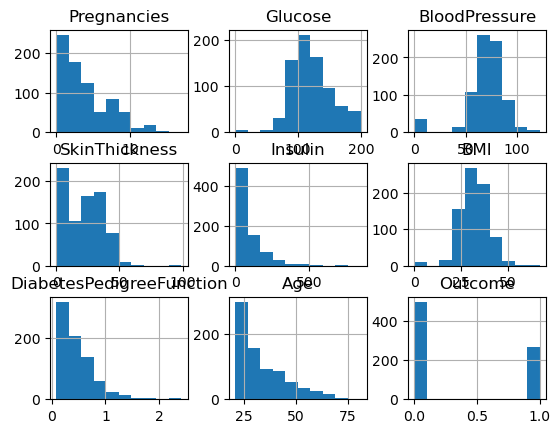

In [4]:
data.hist()

In [6]:
# Replace zero values with mean
data['Glucose'].replace(0, data['Glucose'].mean(), inplace=True)
data['BloodPressure'].replace(0, data['BloodPressure'].mean(), inplace=True)
data['SkinThickness'].replace(0, data['SkinThickness'].median(), inplace=True)
data['Insulin'].replace(0, data['Insulin'].median(), inplace=True)


In [7]:
# Group age into young, middle-aged and old
data['Age_group'] = pd.cut(data['Age'], bins=[20, 40, 60, 100], labels=['Young', 'Middle-aged', 'Senior'])


In [8]:
from sklearn.preprocessing import StandardScaler

# Initialize feature scaler
scaler = StandardScaler()

# Standardize numeric features
numerical_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
data[numerical_features] = scaler.fit_transform(data[numerical_features])


In [9]:
# Summarizing the feature-engineered dataset
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_group
0,0.639947,0.865276,-0.021044,0.831114,-0.608201,0.204013,0.468492,1.425995,1,Middle-aged
1,-0.844885,-1.205989,-0.516583,0.180566,-0.608201,-0.684422,-0.365061,-0.190672,0,Young
2,1.233880,2.015979,-0.681762,-0.469981,-0.608201,-1.103255,0.604397,-0.105584,1,Young
3,-0.844885,-1.074480,-0.516583,-0.469981,-0.006185,-0.494043,-0.920763,-1.041549,0,Young
4,-1.141852,0.503626,-2.663916,0.831114,0.695378,1.409746,5.484909,-0.020496,1,Young


In [10]:
from sklearn.model_selection import train_test_split

X = data.drop(['Outcome', 'Age_group'], axis=1)  # feature
y = data['Outcome']  # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
from sklearn.ensemble import RandomForestClassifier

# Initialize model
model = RandomForestClassifier(random_state=42)

# Training model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [12]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


Accuracy: 0.7467532467532467
Confusion Matrix:
[[78 21]
 [18 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [13]:
# For example, try adjusting the number of trees in a random forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [14]:
# View feature importance
feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


                    Feature  Importance
1                   Glucose    0.259989
5                       BMI    0.167265
7                       Age    0.144865
6  DiabetesPedigreeFunction    0.117464
2             BloodPressure    0.086979
0               Pregnancies    0.076346
4                   Insulin    0.074819
3             SkinThickness    0.072274


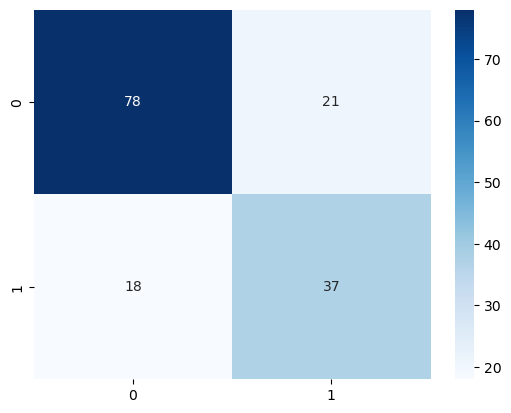

In [15]:
# For example, visualizing the confusion matrix
import seaborn as sns
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.show()


In [16]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter search range
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Hyperparameter search using GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Output the best hyperparameters
print("Best Parameters:", grid_search.best_params_)

# Retrain the model using optimal hyperparameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Evaluate on the test set
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
class_report_best = classification_report(y_test, y_pred_best)

print(f"Accuracy with Best Model: {accuracy_best}")
print(f"Confusion Matrix with Best Model:\n{conf_matrix_best}")
print(f"Classification Report with Best Model:\n{class_report_best}")


E:\Conda\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "E:\Conda\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Conda\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "E:\Conda\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "E:\Conda\lib\site-packages\sklearn\utils\_param_validation.py", line 96, in validate_parameter_constraints

Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 100}
Accuracy with Best Model: 0.7467532467532467
Confusion Matrix with Best Model:
[[78 21]
 [18 37]]
Classification Report with Best Model:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [17]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the gradient boosted tree model
gb_model = GradientBoostingClassifier(
    n_estimators=100,  # number of trees
    learning_rate=0.1,  # Learning rate, controls the contribution of each tree
    max_depth=3  # maximum depth per tree
)

# Train a gradient boosted tree model
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluating the performance of gradient boosted trees
accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
class_report_gb = classification_report(y_test, y_pred_gb)

print(f"Accuracy with Gradient Boosting Model: {accuracy_gb}")
print(f"Confusion Matrix with Gradient Boosting Model:\n{conf_matrix_gb}")
print(f"Classification Report with Gradient Boosting Model:\n{class_report_gb}")


Accuracy with Gradient Boosting Model: 0.7467532467532467
Confusion Matrix with Gradient Boosting Model:
[[76 23]
 [16 39]]
Classification Report with Gradient Boosting Model:
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        99
           1       0.63      0.71      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



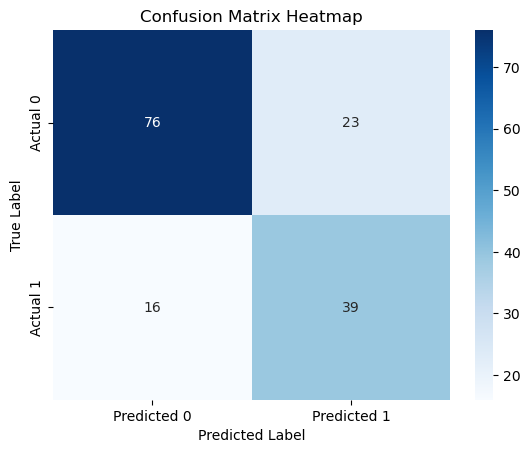

In [18]:
## I tried machine learning methods such as tree models, random forest hyperparameters, and ensemble learning, but the accuracy was still only about 75%. I think this is caused by the upper limit of the data set. Now I will visualize my model
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a heatmap of a confusion matrix
sns.heatmap(conf_matrix_gb, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()


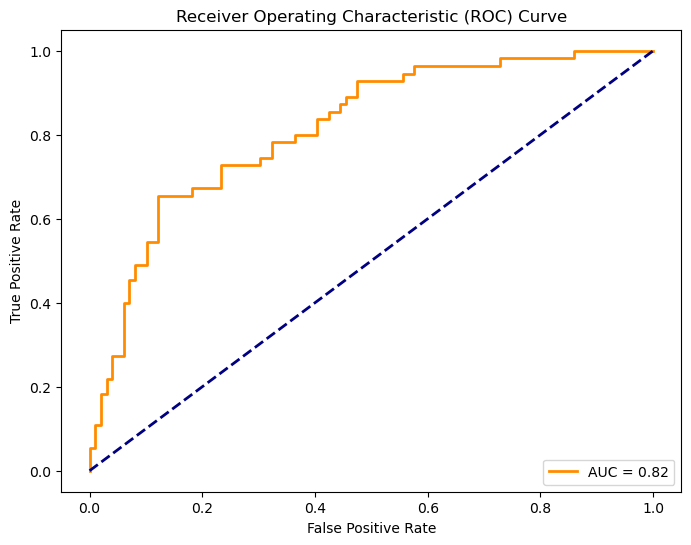

In [19]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, gb_model.predict_proba(X_test)[:, 1])

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Draw ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


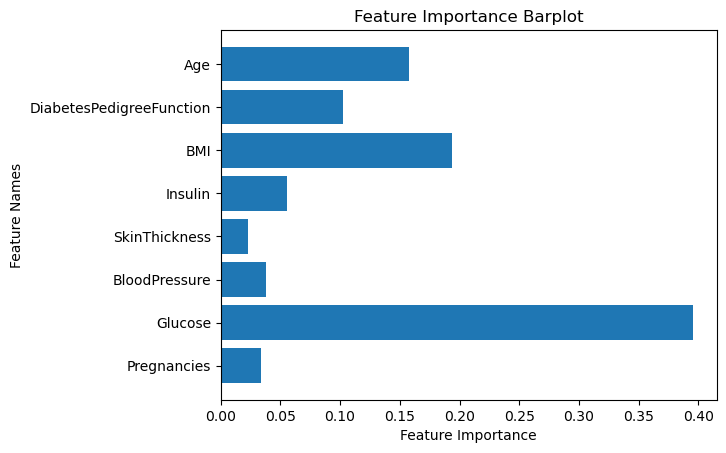

In [20]:
# Get feature importance
feature_importances = gb_model.feature_importances_

# Visualize feature importance
feature_names = X.columns
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Feature Importance Barplot')
plt.show()